In [1]:
from comp_features import generate_features
import pandas as pd
from train_model import train_kmeans, plot_market_regime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 你的 API Key
API_KEY = "ab746526067b62ac85bcf51ef80eae5a"

# 选择资产
ASSET = "BBG AGG BOND"

# 读取数据
df = pd.read_excel(f"/Users/charlesxiong/Desktop/IBKR_algo/ode/data/{ASSET}/{ASSET}.xlsx")
df_nasdaq = pd.read_excel(f"/Users/charlesxiong/Desktop/IBKR_algo/ode/data/SPX/SPX.xlsx")[['DateTime', 'SPX']]

# 计算所有特征
df_features = generate_features(df, ASSET, API_KEY)
df_features = pd.merge(df_features, df_nasdaq, on='DateTime', how='left')
df_features['Corr'] = df_features['SPX'].rolling(window=252, min_periods=150).corr(df_features['BBG AGG BOND'])

# 保存结果
df_features['Market_Regime_Num_Train'] = 0
df_features



,DateTime,BBG AGG BOND,VIX,BBG AGG BOND_returns,BBG AGG BOND_mean_ret_5d,BBG AGG BOND_mean_ret_10d,BBG AGG BOND_mean_ret_21d,BBG AGG BOND_mean_ret_120d,BBG AGG BOND_downside_std_5d,BBG AGG BOND_downside_std_10d,...,BBG AGG BOND_sortino_5d,BBG AGG BOND_sortino_10d,BBG AGG BOND_sortino_21d,BBG AGG BOND_sortino_120d,T10Y2Y_EWMA_10,DGS2_diff_EWMA_21,VIX_EWMA_63,SPX,Corr,Market_Regime_Num_Train
0,1990-02-28,393.75,21.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.102264,0.001311,21.990000,331.89,NaN,0
1,1990-03-01,392.47,21.90,-0.003256,-0.003256,-0.003256,-0.003256,-0.003256,NaN,NaN,...,NaN,NaN,NaN,NaN,0.099433,0.004516,21.989015,332.74,NaN,0
2,1990-03-02,393.29,21.34,0.002087,-0.002564,-0.002898,-0.003083,-0.003225,NaN,NaN,...,NaN,NaN,NaN,NaN,0.096793,0.002746,21.981914,335.54,NaN,0
3,1990-03-05,391.64,22.03,-0.004204,-0.002777,-0.002986,-0.003119,-0.003231,0.000670,0.000670,...,-4.141716,-4.453526,-4.652353,-4.819312,0.097007,0.004929,21.982440,333.74,NaN,0
4,1990-03-06,392.74,20.55,0.002805,-0.002054,-0.002598,-0.002927,-0.003196,0.000670,0.000670,...,-3.064008,-3.875123,-4.365465,-4.767459,0.093860,0.004444,21.966766,337.93,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,2025-03-03,2254.32,21.30,0.002336,0.001731,0.001199,0.000674,0.000208,0.001631,0.001719,...,1.061127,0.697687,0.356999,0.087412,0.254193,-0.008964,16.659074,5849.72,0.661166,0
8770,2025-03-04,2248.17,21.30,-0.002732,0.001153,0.000936,0.000564,0.000191,0.001542,0.001672,...,0.747561,0.559552,0.302820,0.080525,0.254582,-0.008673,16.659074,5778.15,0.658558,0
8771,2025-03-05,2239.83,21.30,-0.003717,0.000523,0.000624,0.000425,0.000168,0.001576,0.001684,...,0.331564,0.370622,0.228670,0.071198,0.256954,-0.007418,16.659074,5842.63,0.656520,0
8772,2025-03-06,2238.68,21.30,-0.000514,0.000388,0.000548,0.000394,0.000164,0.001568,0.001668,...,0.247815,0.328547,0.213457,0.069566,0.261846,-0.008151,16.659074,5738.52,0.653440,0


In [3]:
# 选择特征和目标
feature_columns = [
    f"{ASSET}_mean_ret_5d", f"{ASSET}_mean_ret_21d", f"{ASSET}_mean_ret_10d", f"{ASSET}_mean_ret_120d", 
    f"{ASSET}_downside_std_5d", f"{ASSET}_downside_std_21d",
    f"{ASSET}_sortino_5d", f"{ASSET}_sortino_21d", f"{ASSET}_sortino_10d"
]

feature_columns_xgb = feature_columns + [            
    "T10Y2Y_EWMA_10", "DGS2_diff_EWMA_21", "VIX_EWMA_63", "Corr"]


df_result = df_features.copy()
df_result

,DateTime,BBG AGG BOND,VIX,BBG AGG BOND_returns,BBG AGG BOND_mean_ret_5d,BBG AGG BOND_mean_ret_10d,BBG AGG BOND_mean_ret_21d,BBG AGG BOND_mean_ret_120d,BBG AGG BOND_downside_std_5d,BBG AGG BOND_downside_std_10d,...,BBG AGG BOND_sortino_5d,BBG AGG BOND_sortino_10d,BBG AGG BOND_sortino_21d,BBG AGG BOND_sortino_120d,T10Y2Y_EWMA_10,DGS2_diff_EWMA_21,VIX_EWMA_63,SPX,Corr,Market_Regime_Num_Train
0,1990-02-28,393.75,21.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.102264,0.001311,21.990000,331.89,NaN,0
1,1990-03-01,392.47,21.90,-0.003256,-0.003256,-0.003256,-0.003256,-0.003256,NaN,NaN,...,NaN,NaN,NaN,NaN,0.099433,0.004516,21.989015,332.74,NaN,0
2,1990-03-02,393.29,21.34,0.002087,-0.002564,-0.002898,-0.003083,-0.003225,NaN,NaN,...,NaN,NaN,NaN,NaN,0.096793,0.002746,21.981914,335.54,NaN,0
3,1990-03-05,391.64,22.03,-0.004204,-0.002777,-0.002986,-0.003119,-0.003231,0.000670,0.000670,...,-4.141716,-4.453526,-4.652353,-4.819312,0.097007,0.004929,21.982440,333.74,NaN,0
4,1990-03-06,392.74,20.55,0.002805,-0.002054,-0.002598,-0.002927,-0.003196,0.000670,0.000670,...,-3.064008,-3.875123,-4.365465,-4.767459,0.093860,0.004444,21.966766,337.93,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,2025-03-03,2254.32,21.30,0.002336,0.001731,0.001199,0.000674,0.000208,0.001631,0.001719,...,1.061127,0.697687,0.356999,0.087412,0.254193,-0.008964,16.659074,5849.72,0.661166,0
8770,2025-03-04,2248.17,21.30,-0.002732,0.001153,0.000936,0.000564,0.000191,0.001542,0.001672,...,0.747561,0.559552,0.302820,0.080525,0.254582,-0.008673,16.659074,5778.15,0.658558,0
8771,2025-03-05,2239.83,21.30,-0.003717,0.000523,0.000624,0.000425,0.000168,0.001576,0.001684,...,0.331564,0.370622,0.228670,0.071198,0.256954,-0.007418,16.659074,5842.63,0.656520,0
8772,2025-03-06,2238.68,21.30,-0.000514,0.000388,0.000548,0.000394,0.000164,0.001568,0.001668,...,0.247815,0.328547,0.213457,0.069566,0.261846,-0.008151,16.659074,5738.52,0.653440,0


✅ Processing: 1992-01-01 to 2007-01-01
✅ Final chosen penalty: 19, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.16614639469765047}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:27:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


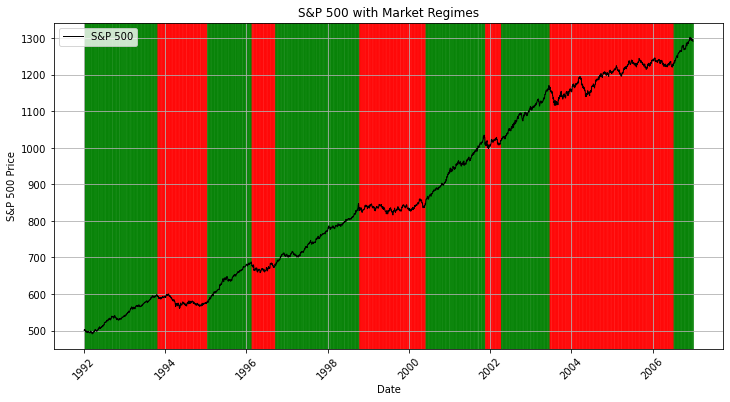

✅ Processing: 1992-07-01 to 2007-07-01
✅ Final chosen penalty: 0, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 25, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.07942138868758097}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


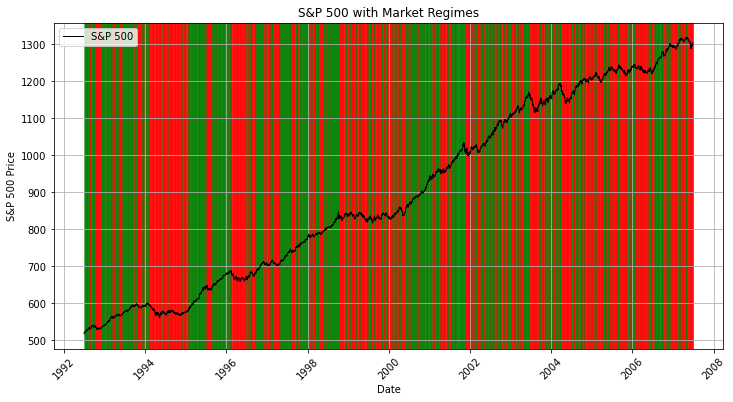

✅ Processing: 1993-01-01 to 2008-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.12708833924180185}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:29:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


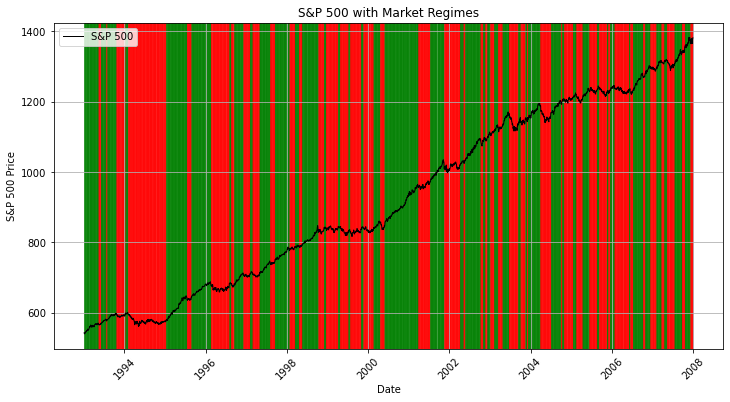

✅ Processing: 1993-07-01 to 2008-07-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 35, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.1409490451553974}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


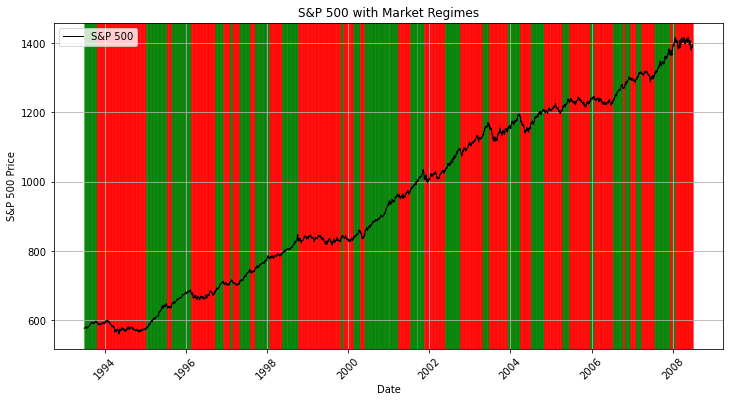

✅ Processing: 1994-01-01 to 2009-01-01
✅ Final chosen penalty: 1, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 15, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.12371855845826629}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


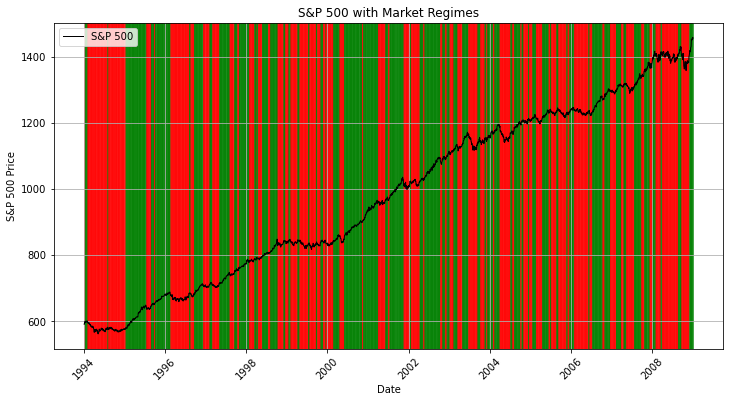

✅ Processing: 1994-07-01 to 2009-07-01
✅ Final chosen penalty: 14, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.19153136935295345}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


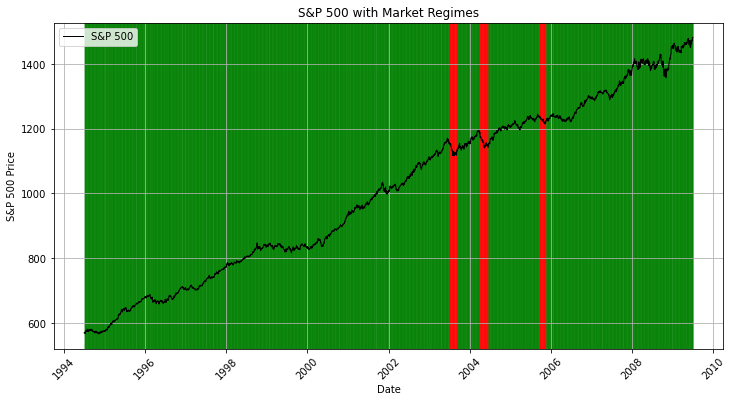

✅ Processing: 1995-01-01 to 2010-01-01
✅ Final chosen penalty: 9, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.19816160082571055}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:32:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


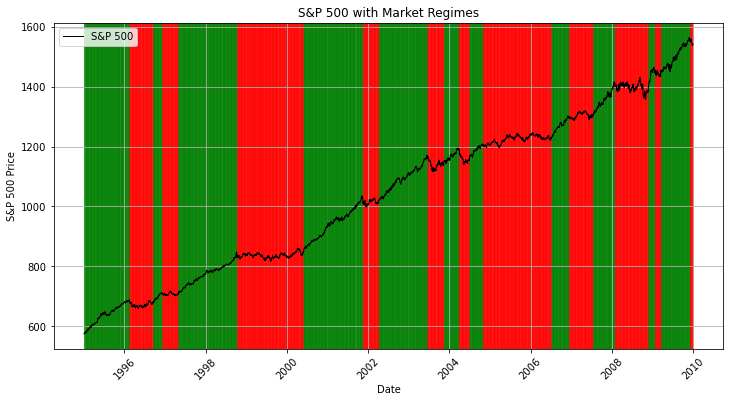

✅ Processing: 1995-07-01 to 2010-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.3151637570429373}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:33:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


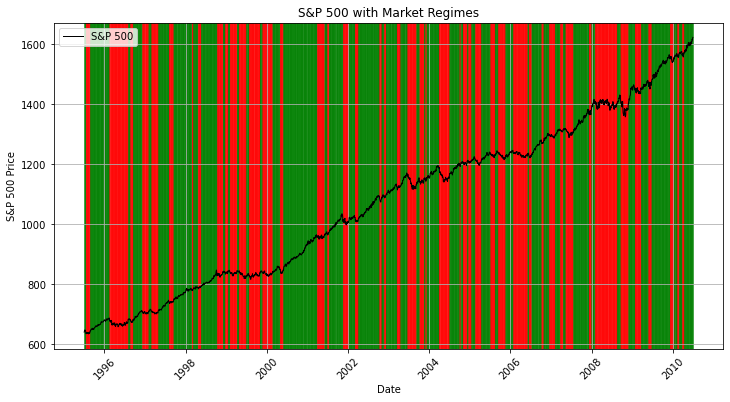

✅ Processing: 1996-01-01 to 2011-01-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 15, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.23497913608822163}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:33:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


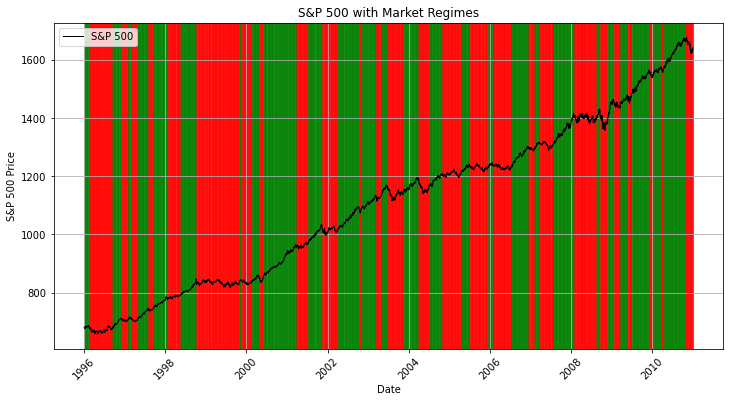

✅ Processing: 1996-07-01 to 2011-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.17453049758746508}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:34:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


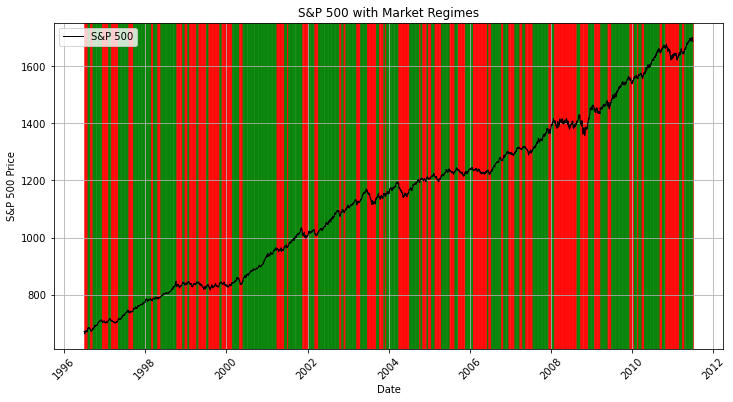

✅ Processing: 1997-01-01 to 2012-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.1674184961723233}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:35:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


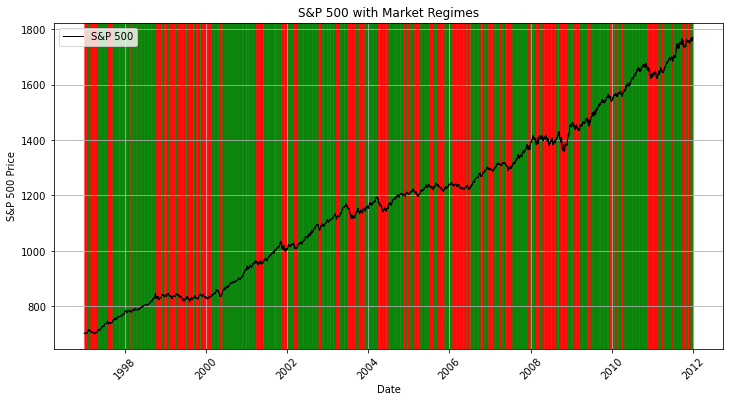

✅ Processing: 1997-07-01 to 2012-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.2936298560390387}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:35:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


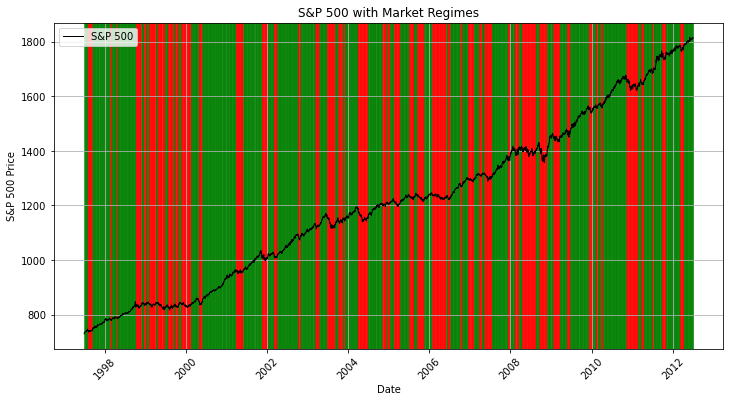

✅ Processing: 1998-01-01 to 2013-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.2674534636725949}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:36:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


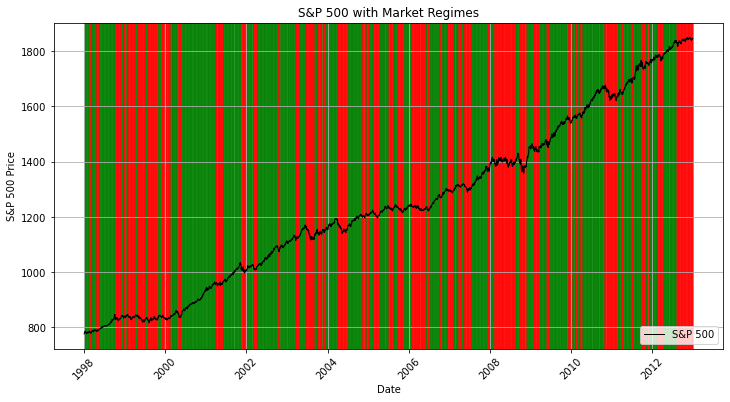

✅ Processing: 1998-07-01 to 2013-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.17581422782407952}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


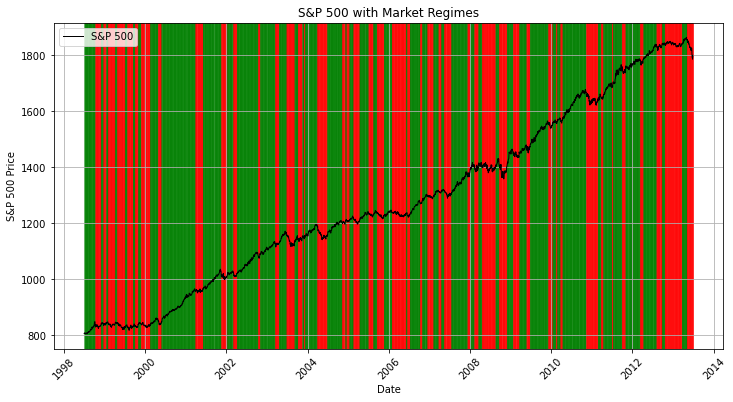

✅ Processing: 1999-01-01 to 2014-01-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.13376751231810058}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


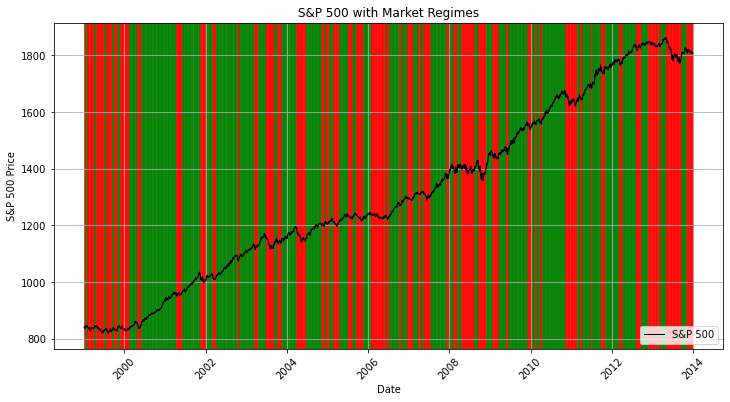

✅ Processing: 1999-07-01 to 2014-07-01
✅ Final chosen penalty: 6, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.19820117331616616}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:38:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


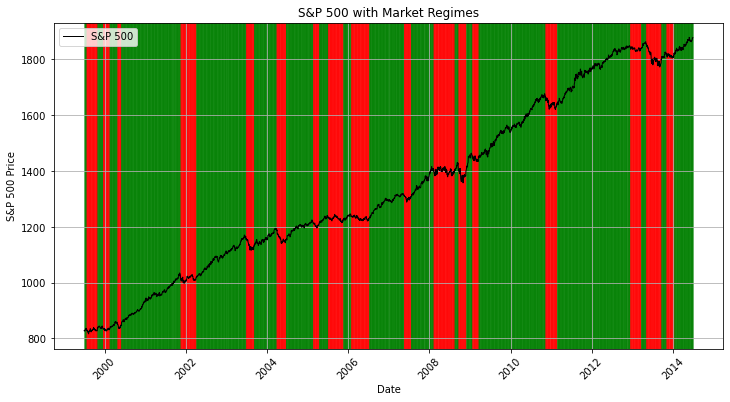

✅ Processing: 2000-01-01 to 2015-01-01
✅ Final chosen penalty: 3, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 35, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.19223431179607808}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:39:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


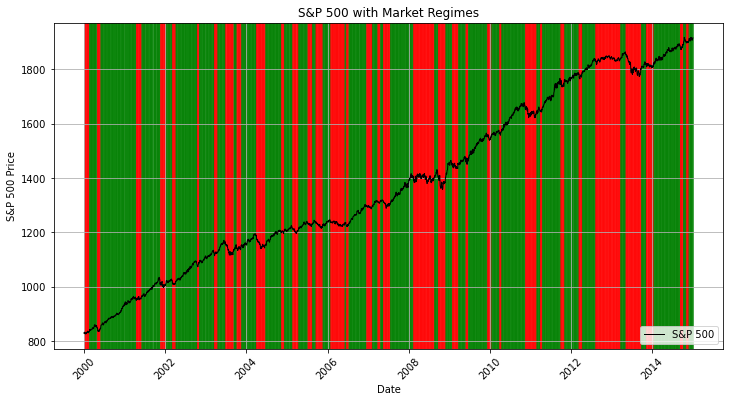

✅ Processing: 2000-07-01 to 2015-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.13237486929833908}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


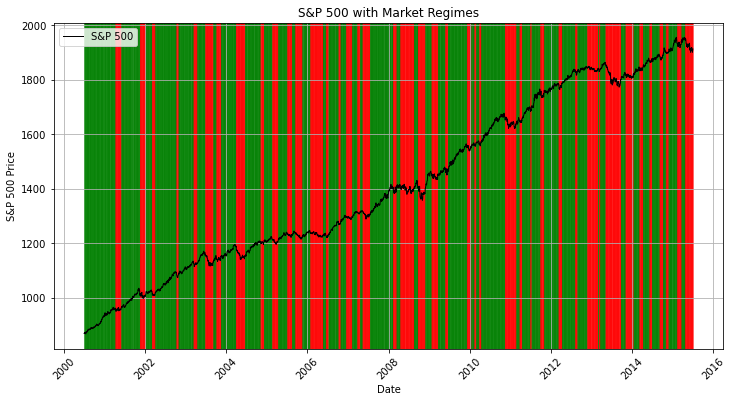

✅ Processing: 2001-01-01 to 2016-01-01
✅ Final chosen penalty: 5, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 35, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.09396814141222709}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


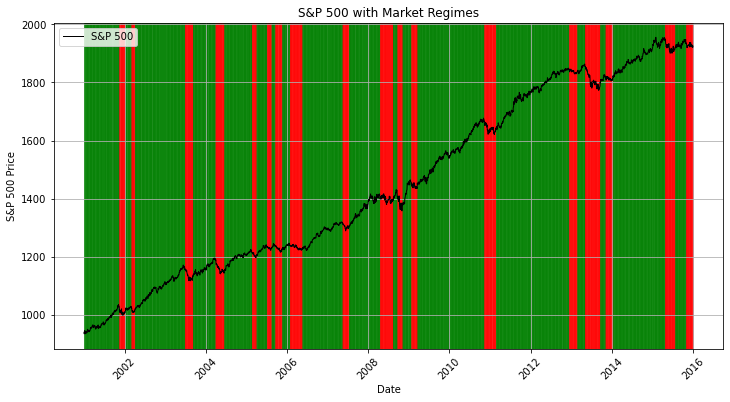

✅ Processing: 2001-07-01 to 2016-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.11320033447448452}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


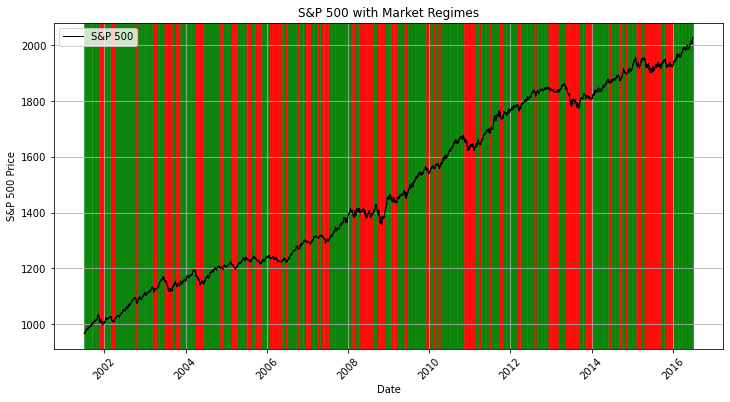

✅ Processing: 2002-01-01 to 2017-01-01
✅ Final chosen penalty: 5, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 35, 'learning_rate': 0.05, 'strat_returns': 0.10937334700271406}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:41:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


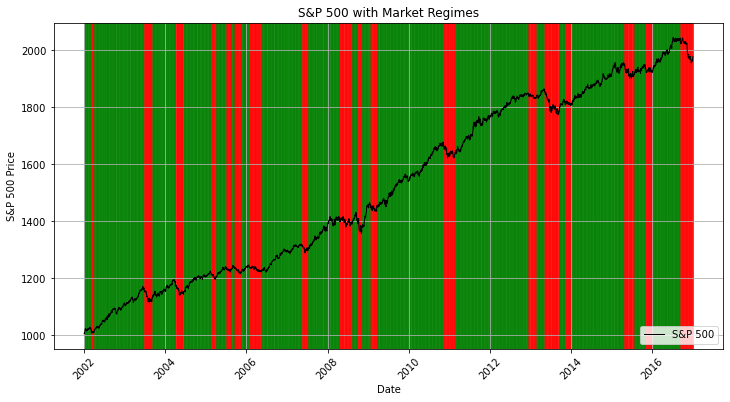

✅ Processing: 2002-07-01 to 2017-07-01
✅ Final chosen penalty: 5, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 25, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.12770901406582302}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


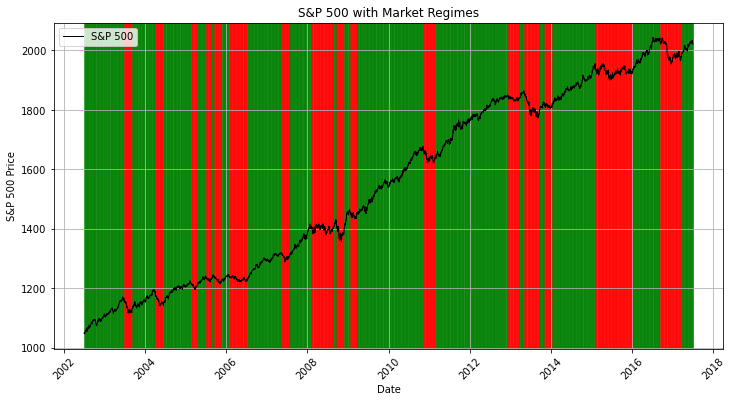

✅ Processing: 2003-01-01 to 2018-01-01
✅ Final chosen penalty: 3, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.07125967906506459}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


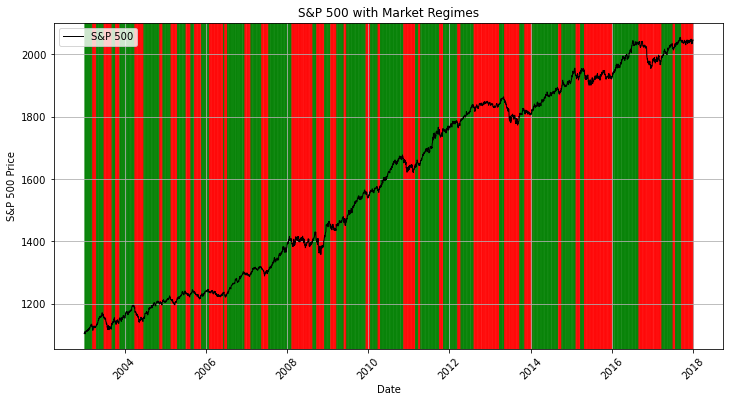

✅ Processing: 2003-07-01 to 2018-07-01
✅ Final chosen penalty: 12, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 35, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.08984736372239355}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:43:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


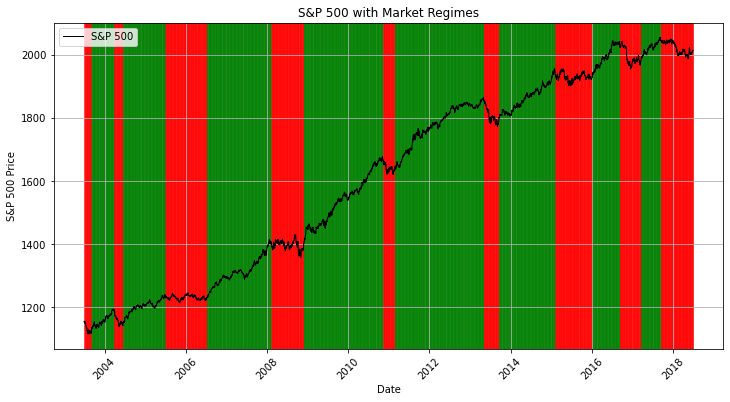

✅ Processing: 2004-01-01 to 2019-01-01
✅ Final chosen penalty: 3, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.06665674204303063}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:44:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


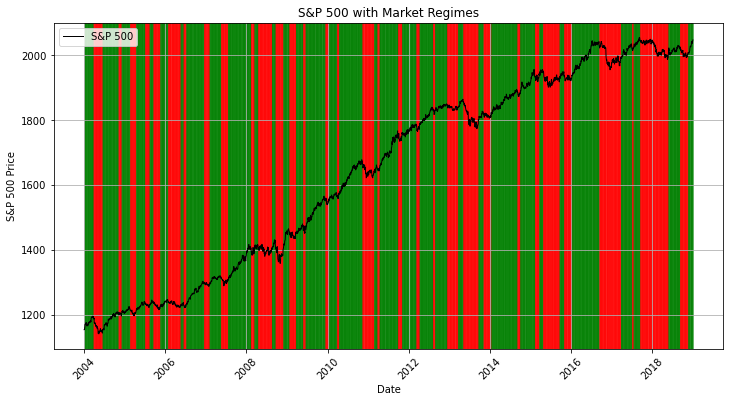

✅ Processing: 2004-07-01 to 2019-07-01
✅ Final chosen penalty: 6, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 35, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.15442303188939377}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:44:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


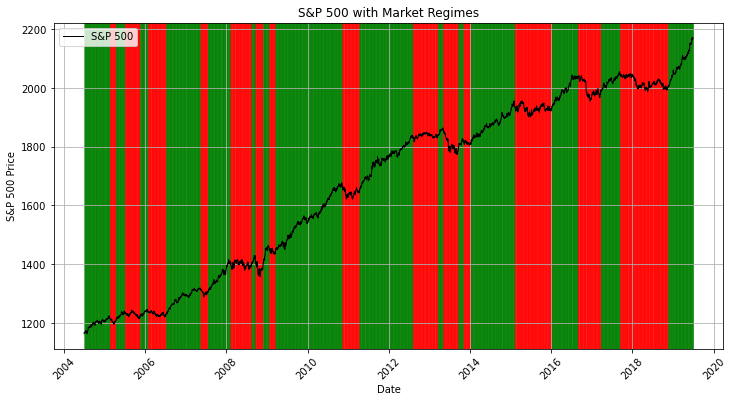

✅ Processing: 2005-01-01 to 2020-01-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 25, 'learning_rate': 0.05, 'strat_returns': 0.18064425951507768}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:45:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


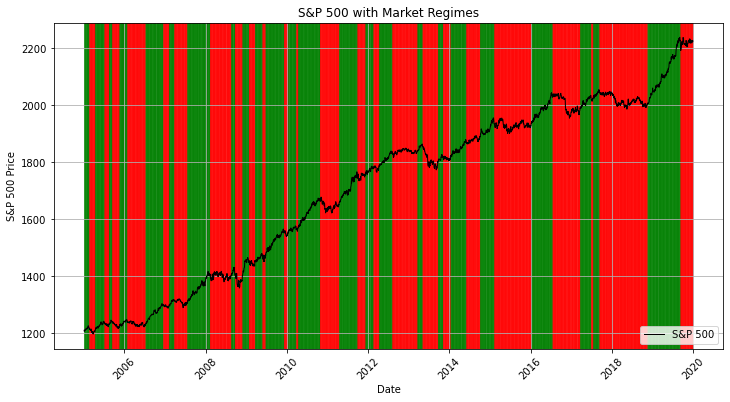

✅ Processing: 2005-07-01 to 2020-07-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 15, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.14921360785699878}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:46:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


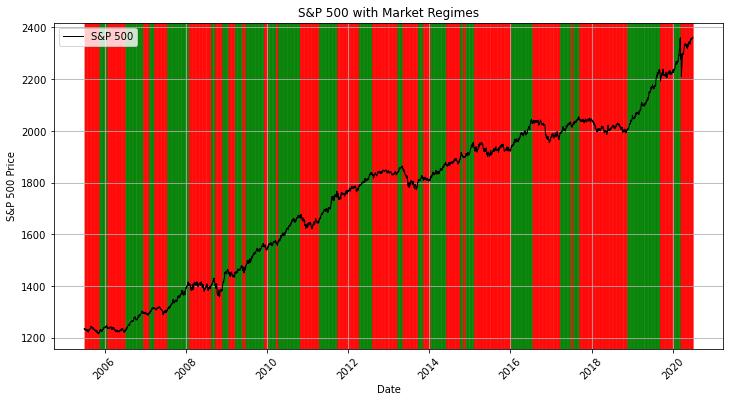

✅ Processing: 2006-01-01 to 2021-01-01
✅ Final chosen penalty: 10, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.21070451856541883}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:47:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


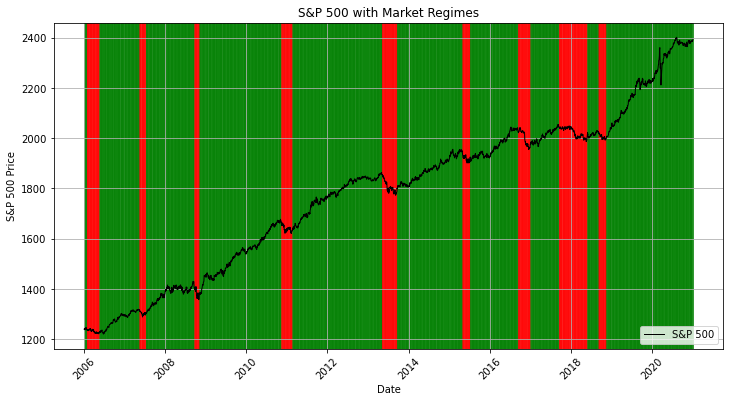

✅ Processing: 2006-07-01 to 2021-07-01
✅ Final chosen penalty: 13, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 35, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.16226356283997356}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:47:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


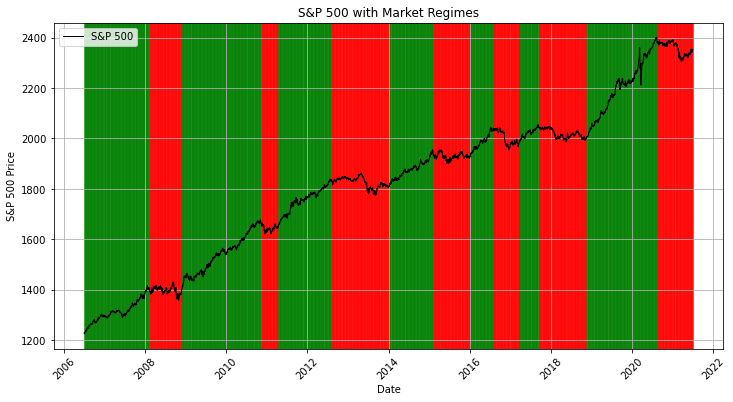

✅ Processing: 2007-01-01 to 2022-01-01
✅ Final chosen penalty: 8, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 35, 'learning_rate': 0.05, 'strat_returns': 0.1626049364859996}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:48:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


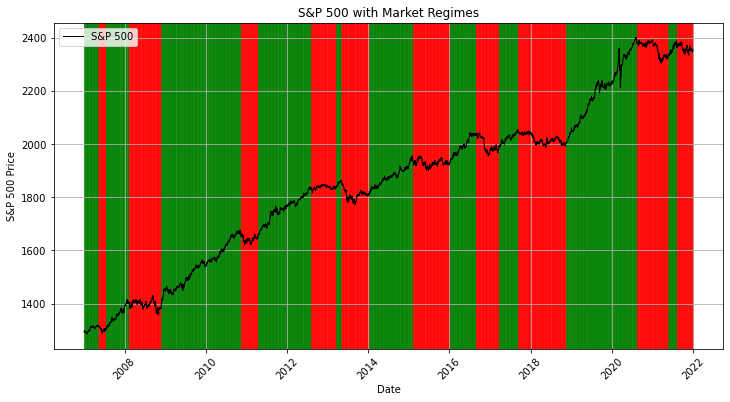

✅ Processing: 2007-07-01 to 2022-07-01
✅ Final chosen penalty: 5, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 5, 'learning_rate': 0.05, 'strat_returns': 0.16670046514211445}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


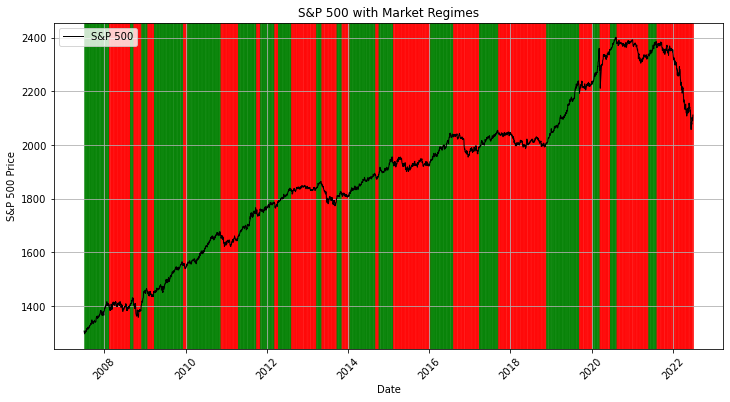

✅ Processing: 2008-01-01 to 2023-01-01
✅ Final chosen penalty: 4, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 35, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.11844191919043268}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


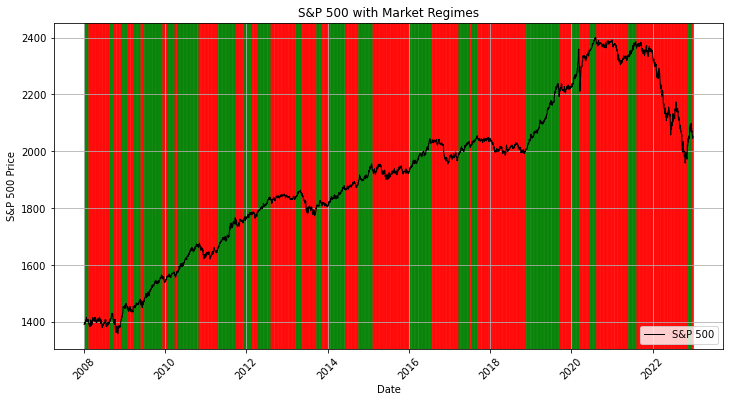

✅ Processing: 2008-07-01 to 2023-07-01
✅ Final chosen penalty: 3, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.06959400315540831}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


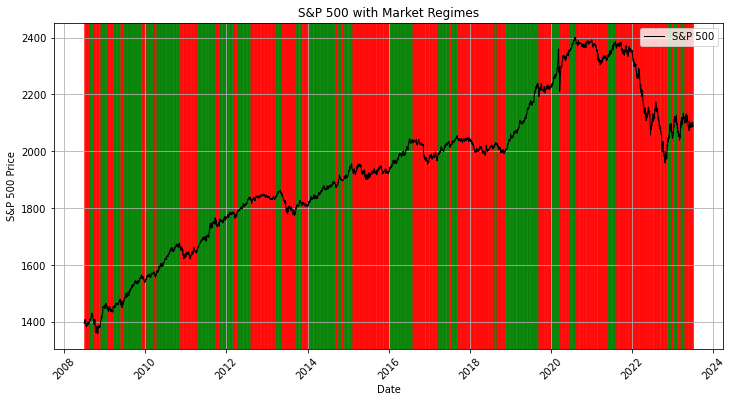

✅ Processing: 2009-01-01 to 2024-01-01
✅ Final chosen penalty: 5, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 20, 'n_estimators': 35, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.12031673166611578}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


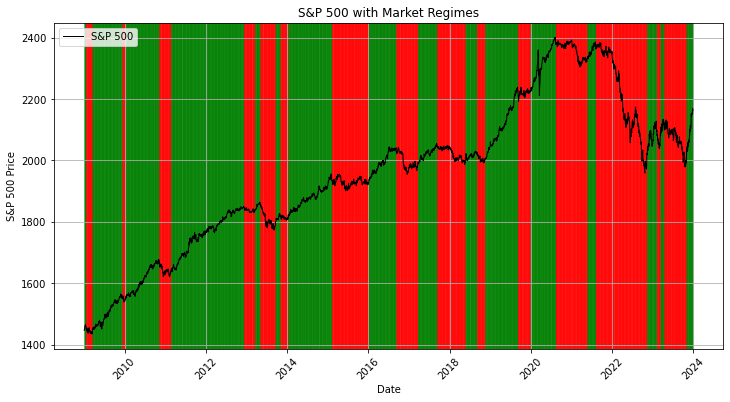

✅ Processing: 2009-07-01 to 2024-07-01
✅ Final chosen penalty: 2, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 10, 'n_estimators': 35, 'learning_rate': 0.25000000000000006, 'strat_returns': 0.06276649159160841}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


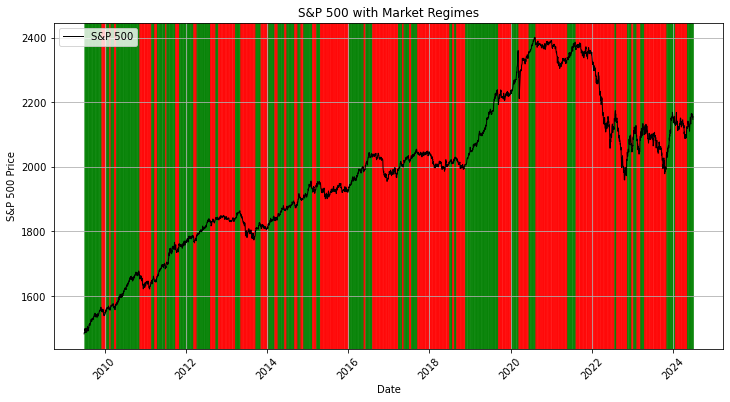

✅ Processing: 2010-01-01 to 2025-01-01
✅ Final chosen penalty: 16, based on training pattern similarity.
✅ Final chosen xgb params: {'max_depth': 5, 'n_estimators': 5, 'learning_rate': 0.15000000000000002, 'strat_returns': 0.04863002750887846}


/Users/charlesxiong/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:52:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "strat_returns" } are not used.

  warnings.warn(smsg, UserWarning)


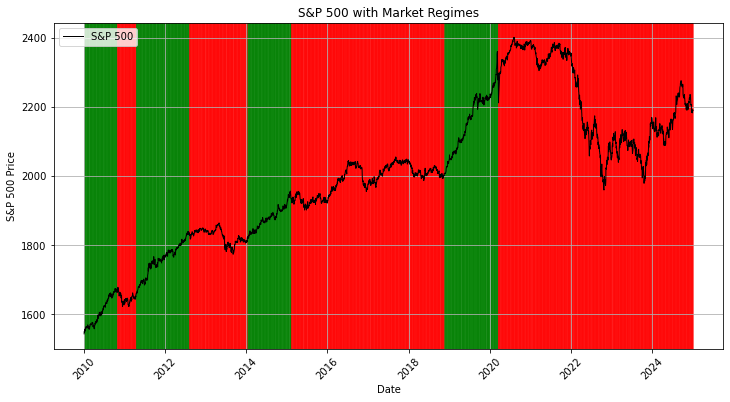

✅ Regime Forecasting Completed!


In [4]:
# 设定参数
prediction_start = "2007-01-02"
initial_train_end = (pd.to_datetime(prediction_start) - pd.DateOffset(days=1)).strftime("%Y-%m-%d")
initial_train_start = (pd.to_datetime(initial_train_end) - pd.DateOffset(years=15)).strftime("%Y-%m-%d")
prediction_end = "2025-06-10"
update_interval_months = 6
validation_years = 4

# 开始滚动训练
current_train_start = pd.to_datetime(initial_train_start)
current_train_end = pd.to_datetime(initial_train_end)
current_prediction_end = pd.to_datetime(prediction_end)
update_interval = pd.DateOffset(months=update_interval_months)

while current_train_end < current_prediction_end:
    print(f"✅ Processing: {current_train_start.date()} to {current_train_end.date()}")
    next_update_date = current_train_end + update_interval

    # 1️⃣ 训练 Jump Model (Penalized K-Means)
    df_result = train_kmeans(df_result, ASSET, feature_columns, feature_columns_xgb, 
                             current_train_start, current_train_end, validation_years=validation_years, 
                             pca=False, n_comp_kmeans = 5, next_update_date=next_update_date, 
                             pca_xgb=False, n_comp_xgb=13)
#     df_result = train_xgb(df_result, ASSET, feature_columns_xgb, current_train_start, current_train_end, validation_years=7, next_update_date=next_update_date)
    plot_market_regime(df_result, ASSET, current_train_start, current_train_end)
    
    # 滚动窗口更新
    current_train_start += update_interval
    
    current_train_end += update_interval

print("✅ Regime Forecasting Completed!")

# 回测

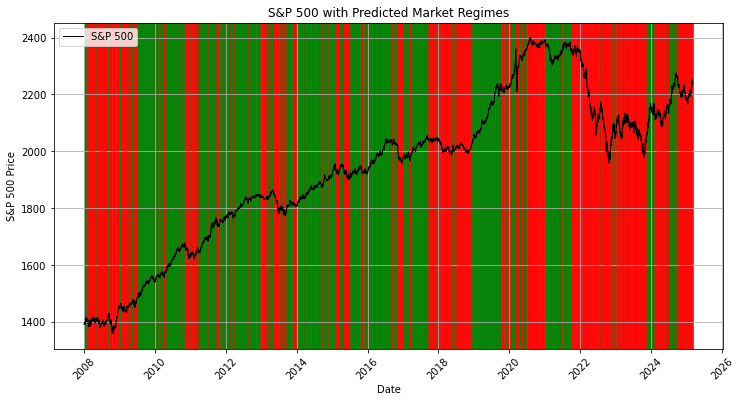

In [5]:
# 过滤数据
start = '2008-01-01'
df_view = df_result[df_result['DateTime'] >= start].reset_index()

# 创建图形
fig, ax = plt.subplots(figsize=(12, 6))

# 画出 S&P 500 走势
ax.plot(df_view['DateTime'].values, df_view[f"{ASSET}"].values, label="S&P 500", color="black", linewidth=1)

# 画出市场状态
for i in range(len(df_view) - 1):
    color = "green" if df_view["Regime_Forecast"].iloc[i] == 1 else "red"
    ax.axvspan(df_view['DateTime'].iloc[i], df_view['DateTime'].iloc[i + 1], color=color, alpha=0.3)

# 添加标题和标签
ax.set_title("S&P 500 with Predicted Market Regimes")
ax.set_xlabel("Date")
ax.set_ylabel("S&P 500 Price")
ax.legend()

# 旋转日期标签
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [6]:
# 由于代码执行状态已重置，df_view 需要重新加载
# 请上传包含 df_view 的数据文件，或者提供相关代码以重新生成 df_view

# 获取今天的日期
today = pd.Timestamp.today()

# 计算过去一个月的开始日期
one_month_ago = today - pd.DateOffset(months=1)

# 筛选过去一个月的数据
df_past_month = df_view[(df_view["DateTime"] >= one_month_ago) & (df_view["DateTime"] < today)].copy()

# 确保 Market_Regime_Num 这一列存在，并映射到文本标签
if "Market_Regime_Num" in df_past_month.columns:
    df_past_month["Market_Regime_Label"] = df_past_month["Regime_Forecast"].map({1: "Bullish", 0: "Bearish"})

# 只选择需要显示的列
columns_to_display = ["DateTime", f"{ASSET}", "Market_Regime_Label"]
df_past_month = df_past_month[columns_to_display]

df_past_month


,DateTime,BBG AGG BOND,Market_Regime_Label


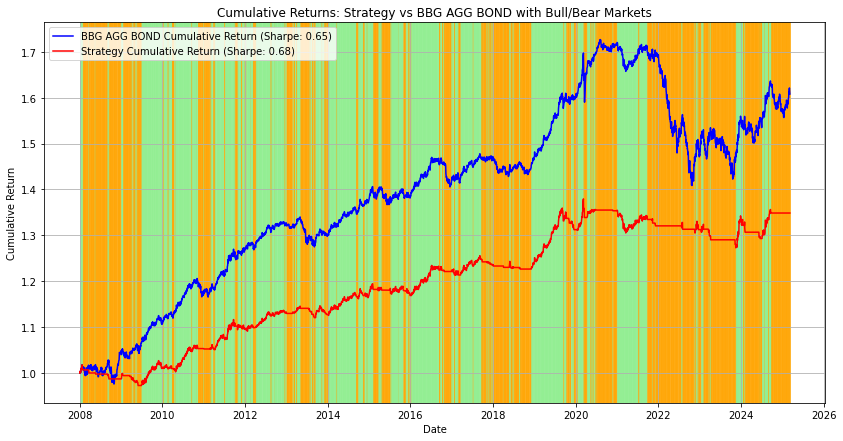

In [7]:
# 复制数据框并确保 DateTime 格式正确
df_test = df_view.copy()
df_test["DateTime"] = pd.to_datetime(df_test["DateTime"])

# 设定市场状态的基础仓位
df_test["Position"] = np.where(df_test["Regime_Forecast"] == 1, 1, 0)

# 避免未来函数问题（仓位延迟一天执行）
df_test["Position"] = df_test["Position"].shift(1)

# 计算每日收益
df_test[f"{ASSET}_Return"] = df_test[f"{ASSET}"].pct_change()
df_test["Strategy_Return"] = df_test[f"{ASSET}_Return"] * df_test["Position"]

# 计算累积收益
df_test[f"{ASSET}_Cumulative"] = (1 + df_test[f"{ASSET}_Return"]).cumprod()
df_test["Strategy_Cumulative"] = (1 + df_test["Strategy_Return"]).cumprod()

# 计算夏普比率
def sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252)

strategy_sharpe = sharpe_ratio(df_test["Strategy_Return"].dropna())
spx_sharpe = sharpe_ratio(df_test[f"{ASSET}_Return"].dropna())

# 绘制回测结果
plt.figure(figsize=(14, 7))
plt.plot(df_test["DateTime"].values, df_test[f"{ASSET}_Cumulative"].values, label=f"{ASSET} Cumulative Return (Sharpe: {spx_sharpe:.2f})", color="blue")
plt.plot(df_test["DateTime"].values, df_test["Strategy_Cumulative"].values, label=f"Strategy Cumulative Return (Sharpe: {strategy_sharpe:.2f})", color="red")

# 画出牛市（绿色）和熊市（粉色）背景
for i in range(1, len(df_test)):
    if df_test["Regime_Forecast"].iloc[i] == 1:  # 牛市
        plt.axvspan(df_test["DateTime"].iloc[i-1], df_test["DateTime"].iloc[i], color="lightgreen", alpha=0.3)
    else:  # 熊市
        plt.axvspan(df_test["DateTime"].iloc[i-1], df_test["DateTime"].iloc[i], color="orange", alpha=0.3)

plt.title(f"Cumulative Returns: Strategy vs {ASSET} with Bull/Bear Markets")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


# 指标

In [8]:
import numpy as np
import pandas as pd
from scipy.stats import skew


df_cleaned = df_test[[f"{ASSET}_Return", 'Strategy_Return', f"{ASSET}_Cumulative", 'Strategy_Cumulative']].dropna()


# 计算指标函数
def sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252) if np.std(returns) != 0 else np.nan

def max_drawdown(cumulative_returns):
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def sortino_ratio(returns):
    downside_returns = returns[returns < 0]
    downside_std = np.std(downside_returns)
    return np.mean(returns) / downside_std * np.sqrt(252) if downside_std != 0 else np.nan

def information_coefficient(predictions, actual_returns):
    return np.corrcoef(predictions, actual_returns)[0, 1] if len(predictions) > 1 else np.nan

def rank_information_coefficient(predictions, actual_returns):
    return np.corrcoef(pd.Series(predictions).rank(), pd.Series(actual_returns).rank())[0, 1] if len(predictions) > 1 else np.nan

def skewness(returns):
    return skew(returns, nan_policy='omit')


# 复制数据并清理 NaN
df_cleaned = df_test.dropna()

# 计算指标
# 计算指标
metrics = {
    "Metric": ["Mean Return", "Standard Deviation", "Sharpe Ratio", "Sortino Ratio", "Max Drawdown", "Skewness", "IC", "Rank IC"],
    f"{ASSET}": [
        (1 + np.mean(df_cleaned[f"{ASSET}_Return"]))**252 - 1,
        np.std(df_cleaned[f"{ASSET}_Return"]) * np.sqrt(252),
        sharpe_ratio(df_cleaned[f"{ASSET}_Return"]),
        sortino_ratio(df_cleaned[f"{ASSET}_Return"]),
        max_drawdown(df_cleaned[f"{ASSET}_Cumulative"]),
        skewness(df_cleaned[f"{ASSET}_Return"]),
        np.nan,  # SPX 无法计算 IC
        np.nan   # SPX 无法计算 Rank IC
    ],
    "Strategy": [
        (1 + np.mean(df_cleaned["Strategy_Return"]))**252 - 1,
        np.std(df_cleaned["Strategy_Return"]) * np.sqrt(252),
        sharpe_ratio(df_cleaned["Strategy_Return"]),
        sortino_ratio(df_cleaned["Strategy_Return"]),
        max_drawdown(df_cleaned["Strategy_Cumulative"]),
        skewness(df_cleaned["Strategy_Return"]),
        information_coefficient(df_cleaned["Position"], df_cleaned[f"{ASSET}_Return"]),
        rank_information_coefficient(df_cleaned["Position"], df_cleaned[f"{ASSET}_Return"])
    ]
}

# 转换为 DataFrame 并展示
metrics_df = pd.DataFrame(metrics)
metrics_df


,Metric,BBG AGG BOND,Strategy
0,Mean Return,0.028683,0.018635
1,Standard Deviation,0.044500,0.026431
2,Sharpe Ratio,0.635528,0.698573
3,Sortino Ratio,0.894583,0.733388
4,Max Drawdown,-0.184050,-0.077120
5,Skewness,-0.158539,-0.213064
6,IC,NaN,0.010423
7,Rank IC,NaN,0.002454


In [9]:
def rolling_sharpe_ratio(returns, window=252*5, step=21):
    sharpe_ratios = []
    cumrets = []
    dates = []

    for start in range(0, len(returns) - window + 1, step):
        end = start + window
        window_returns = returns[start:end]

        # Cumulative return
        cumulative_return = np.prod(1 + window_returns) - 1
        annualized_return = (1 + cumulative_return) ** (252 / window) - 1

        # Annualized volatility
        annualized_vol = np.std(window_returns) * np.sqrt(252)

        sharpe = annualized_return / annualized_vol if annualized_vol != 0 else np.nan

        # Append results
        sharpe_ratios.append(sharpe)
        cumrets.append(cumulative_return)
        dates.append(df_test["DateTime"].iloc[end - 1])

    return pd.DataFrame({
        "Date": dates,
        "Sharpe Ratio": sharpe_ratios,
        "Cumulative Return": cumrets
    })

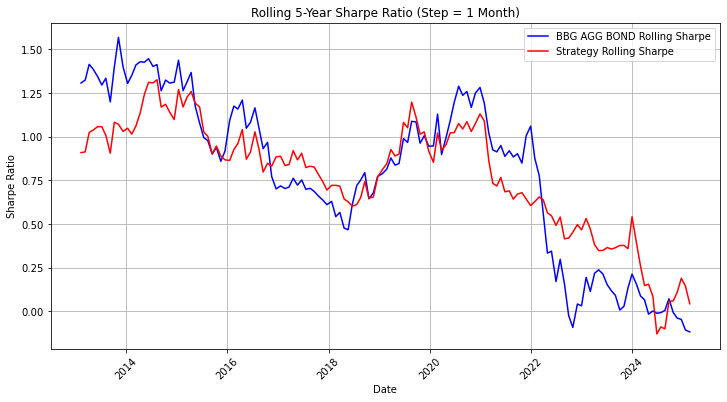

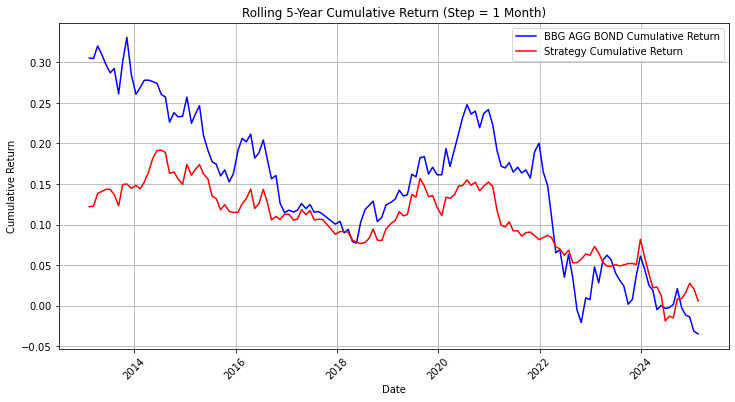

In [12]:
spx_sharpe_df = rolling_sharpe_ratio(df_test[f"{ASSET}_Return"].values)
strategy_sharpe_df = rolling_sharpe_ratio(df_test["Strategy_Return"].values)

# 合并
rolling_sharpe_df = pd.merge(
    spx_sharpe_df, strategy_sharpe_df,
    on="Date",
    suffixes=(f"_{ASSET}", "_Strategy")
)

plt.figure(figsize=(12, 6))
plt.plot(rolling_sharpe_df["Date"].values, rolling_sharpe_df[f"Sharpe Ratio_{ASSET}"].values, label=f"{ASSET} Rolling Sharpe", color="blue")
plt.plot(rolling_sharpe_df["Date"].values, rolling_sharpe_df["Sharpe Ratio_Strategy"].values, label="Strategy Rolling Sharpe", color="red")
plt.title("Rolling 5-Year Sharpe Ratio (Step = 1 Month)")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(rolling_sharpe_df["Date"].values, rolling_sharpe_df[f"Cumulative Return_{ASSET}"].values, label=f"{ASSET} Cumulative Return", color="blue")
plt.plot(rolling_sharpe_df["Date"].values, rolling_sharpe_df["Cumulative Return_Strategy"].values, label="Strategy Cumulative Return", color="red")
plt.title("Rolling 5-Year Cumulative Return (Step = 1 Month)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


In [11]:
df_test[f'{ASSET}_Position'] = df_test['Position']
df_test[['DateTime', f'{ASSET}_Position', f'{ASSET}_Return']].to_excel(f'/Users/charlesxiong/Desktop/IBKR_algo/ode/data/{ASSET}/{ASSET}_positions.xlsx')

<ipython-input-11-016a9cae1dd0>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df_test[['DateTime', f'{ASSET}_Position', f'{ASSET}_Return']].to_excel(f'/Users/charlesxiong/Desktop/IBKR_algo/ode/data/{ASSET}/{ASSET}_positions.xlsx')
